In [1]:
import gensim
import numpy
import utils
lst=['אבי','הי"ו','הצעיר','הראשונים','הרה"ג','ואביו','והנ"י','ז"ל','זי"ע','זיע"א','זלה"ה','זללה"ה','זצ"ל','זצוק"ל','זקני','יצ"ו','כמה"ר','כמוה"ר','מהר"ר','מו"ר','נ"י','נ"ר','נר"ו','סילט"א','ע"ה','שליט"א','תלמידי']

In [2]:
def my_var(lst,model):
    a = numpy.array([])
    for i in lst:
        a = numpy.append(a, model.wv.get_vector(i))
    a = a.reshape(len(lst), model.vector_size)
    res = numpy.var(a, axis=0)
    nres=[]
    for e in range(len(res)):
        nres.append([e,res[e]])
    return nres

In [3]:
def remove_dim(lst,model,dim):
    arr=[]
    var_lst=(my_var(lst,model))
    var_lst.sort(key=lambda k:k[1])
    for i in var_lst[:dim]:
        arr.append(i[0])
    arr.sort()
    vectors=model.wv.vectors[:,arr]
    model.wv.vectors=vectors
    model.wv.vectors_norm=None
    model.wv.init_sims()
    return model

In [4]:
arr=[]
arr.append(gensim.models.Word2Vec.load("w2v_1_heb"))
arr.append(gensim.models.Word2Vec.load("heb_56"))
for i in range(10):
    arr.append(remove_dim(lst,gensim.models.Word2Vec.load("w2v_56_300dim_heb"),300-(i*10)))
print(len(arr))
for i in arr:
    print(i," the dim is: ",len(i.wv.get_vector("תורה")))

12
Word2Vec(vocab=241788, size=100, alpha=0.025)  the dim is:  100
Word2Vec(vocab=164667, size=100, alpha=0.025)  the dim is:  100
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  300
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  290
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  280
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  270
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  260
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  250
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  240
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  230
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  220
Word2Vec(vocab=164667, size=300, alpha=0.025)  the dim is:  210


In [5]:

res2=[]
reslst=[]
templst=[]
for i in range(len(arr)):
    templst.append(lst)
for i in range(len(arr)):
    res2.append([])
    reslst.append(templst.copy())
    for j in range(len(lst)):
        print(j,"-",i,". number of word in the result: "+str(len(utils.one_mean(templst[i],arr[i]))))
        res2[i].append(len(utils.one_mean(templst[i],arr[i])))
        dist = []
        for word in templst[i]:
            temp=utils.my_similarity(arr[i].wv.get_vector(word),utils.avg_vec_model(templst[i],arr[i]))
            dist.append((word,temp))
        dist.sort(key=lambda k:k[1])
        del dist[0]
        ldist=[e[0] for e in dist]
        templst[i]=ldist
res2

0 - 0 . number of word in the result: 132484
1 - 0 . number of word in the result: 41733
2 - 0 . number of word in the result: 23714
3 - 0 . number of word in the result: 10166
4 - 0 . number of word in the result: 6488
5 - 0 . number of word in the result: 3551
6 - 0 . number of word in the result: 3201
7 - 0 . number of word in the result: 2380
8 - 0 . number of word in the result: 1259
9 - 0 . number of word in the result: 1061
10 - 0 . number of word in the result: 707
11 - 0 . number of word in the result: 206
12 - 0 . number of word in the result: 146
13 - 0 . number of word in the result: 110
14 - 0 . number of word in the result: 97
15 - 0 . number of word in the result: 48
16 - 0 . number of word in the result: 38
17 - 0 . number of word in the result: 33
18 - 0 . number of word in the result: 21
19 - 0 . number of word in the result: 14
20 - 0 . number of word in the result: 6
21 - 0 . number of word in the result: 6
22 - 0 . number of word in the result: 6
23 - 0 . number of

9 - 7 . number of word in the result: 72
10 - 7 . number of word in the result: 39
11 - 7 . number of word in the result: 27
12 - 7 . number of word in the result: 27
13 - 7 . number of word in the result: 22
14 - 7 . number of word in the result: 20
15 - 7 . number of word in the result: 13
16 - 7 . number of word in the result: 12
17 - 7 . number of word in the result: 10
18 - 7 . number of word in the result: 9
19 - 7 . number of word in the result: 7
20 - 7 . number of word in the result: 6
21 - 7 . number of word in the result: 5
22 - 7 . number of word in the result: 5
23 - 7 . number of word in the result: 4
24 - 7 . number of word in the result: 3
25 - 7 . number of word in the result: 2
26 - 7 . number of word in the result: 1
0 - 8 . number of word in the result: 17158
1 - 8 . number of word in the result: 7341
2 - 8 . number of word in the result: 1543
3 - 8 . number of word in the result: 1050
4 - 8 . number of word in the result: 477
5 - 8 . number of word in the result: 3

[[132484,
  41733,
  23714,
  10166,
  6488,
  3551,
  3201,
  2380,
  1259,
  1061,
  707,
  206,
  146,
  110,
  97,
  48,
  38,
  33,
  21,
  14,
  6,
  6,
  6,
  3,
  3,
  1,
  1],
 [40957,
  45706,
  10706,
  3515,
  2724,
  1488,
  1150,
  833,
  534,
  392,
  278,
  110,
  156,
  68,
  33,
  20,
  15,
  16,
  29,
  8,
  6,
  6,
  5,
  4,
  3,
  2,
  1],
 [32137,
  29566,
  4836,
  1453,
  1277,
  937,
  691,
  308,
  280,
  113,
  40,
  32,
  34,
  27,
  31,
  14,
  12,
  10,
  10,
  7,
  6,
  5,
  5,
  4,
  3,
  2,
  0],
 [28393,
  18225,
  3701,
  1317,
  1358,
  668,
  501,
  286,
  153,
  52,
  39,
  32,
  35,
  26,
  26,
  14,
  11,
  9,
  10,
  7,
  7,
  5,
  5,
  4,
  2,
  2,
  1],
 [28129,
  15237,
  3268,
  1645,
  1573,
  700,
  380,
  166,
  135,
  57,
  42,
  29,
  29,
  27,
  25,
  13,
  13,
  10,
  9,
  7,
  6,
  6,
  5,
  3,
  2,
  1,
  0],
 [28705,
  13668,
  2278,
  1295,
  889,
  695,
  326,
  90,
  78,
  55,
  39,
  25,
  28,
  23,
  23,
  14,
  12,
  11,
  9,

In [6]:
for i in res2:
    print(i)

[132484, 41733, 23714, 10166, 6488, 3551, 3201, 2380, 1259, 1061, 707, 206, 146, 110, 97, 48, 38, 33, 21, 14, 6, 6, 6, 3, 3, 1, 1]
[40957, 45706, 10706, 3515, 2724, 1488, 1150, 833, 534, 392, 278, 110, 156, 68, 33, 20, 15, 16, 29, 8, 6, 6, 5, 4, 3, 2, 1]
[32137, 29566, 4836, 1453, 1277, 937, 691, 308, 280, 113, 40, 32, 34, 27, 31, 14, 12, 10, 10, 7, 6, 5, 5, 4, 3, 2, 0]
[28393, 18225, 3701, 1317, 1358, 668, 501, 286, 153, 52, 39, 32, 35, 26, 26, 14, 11, 9, 10, 7, 7, 5, 5, 4, 2, 2, 1]
[28129, 15237, 3268, 1645, 1573, 700, 380, 166, 135, 57, 42, 29, 29, 27, 25, 13, 13, 10, 9, 7, 6, 6, 5, 3, 2, 1, 0]
[28705, 13668, 2278, 1295, 889, 695, 326, 90, 78, 55, 39, 25, 28, 23, 23, 14, 12, 11, 9, 8, 6, 5, 4, 4, 2, 2, 0]
[23907, 8727, 1948, 868, 875, 599, 343, 109, 90, 79, 38, 28, 29, 24, 23, 14, 12, 10, 8, 7, 6, 6, 5, 3, 3, 1, 1]
[16133, 7844, 1724, 1298, 994, 503, 283, 130, 83, 72, 39, 27, 27, 22, 20, 13, 12, 10, 9, 7, 6, 5, 5, 4, 3, 2, 1]
[17158, 7341, 1543, 1050, 477, 362, 209, 109, 68, 55, 43,

for i in range(len(reslst)):
    for j in range(len(reslst[i])):
        for k in range(j,len(reslst[i])):
            for l in range(len(reslst[i][j])):
                if reslst[i][j][l] not in reslst[i][k]:
                    print("error round",i," vocab number:",j," vs vocab number:",k," num of the word in the first vocab: ",l)
                    print(reslst[i][j][l], reslst[i][k])

tlst=lst
for i in range(3):
    dist = []
    for word in tlst:
        temp=utils.my_similarity(arr[2].wv.get_vector(word),utils.avg_vec_model(tlst,arr[2]))
        dist.append((word,temp))
    dist.sort(key=lambda k:k[1])
    del dist[0]
    ldist=[e[0] for e in dist]
    tlst=ldist

t=utils.name_list(utils.one_mean(tlst,arr[2]))

import xlsxwriter

wb = xlsxwriter.Workbook('dem.xlsx')
ws = wb.add_worksheet("words list")
for i in range(1,len(t)+1):
    ws.write(i,0,t[i-1])
wb.close()

In [7]:
import matplotlib.pyplot as plt 

In [66]:
x= numpy.arange(27,0,-1)
x

array([27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11,
       10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

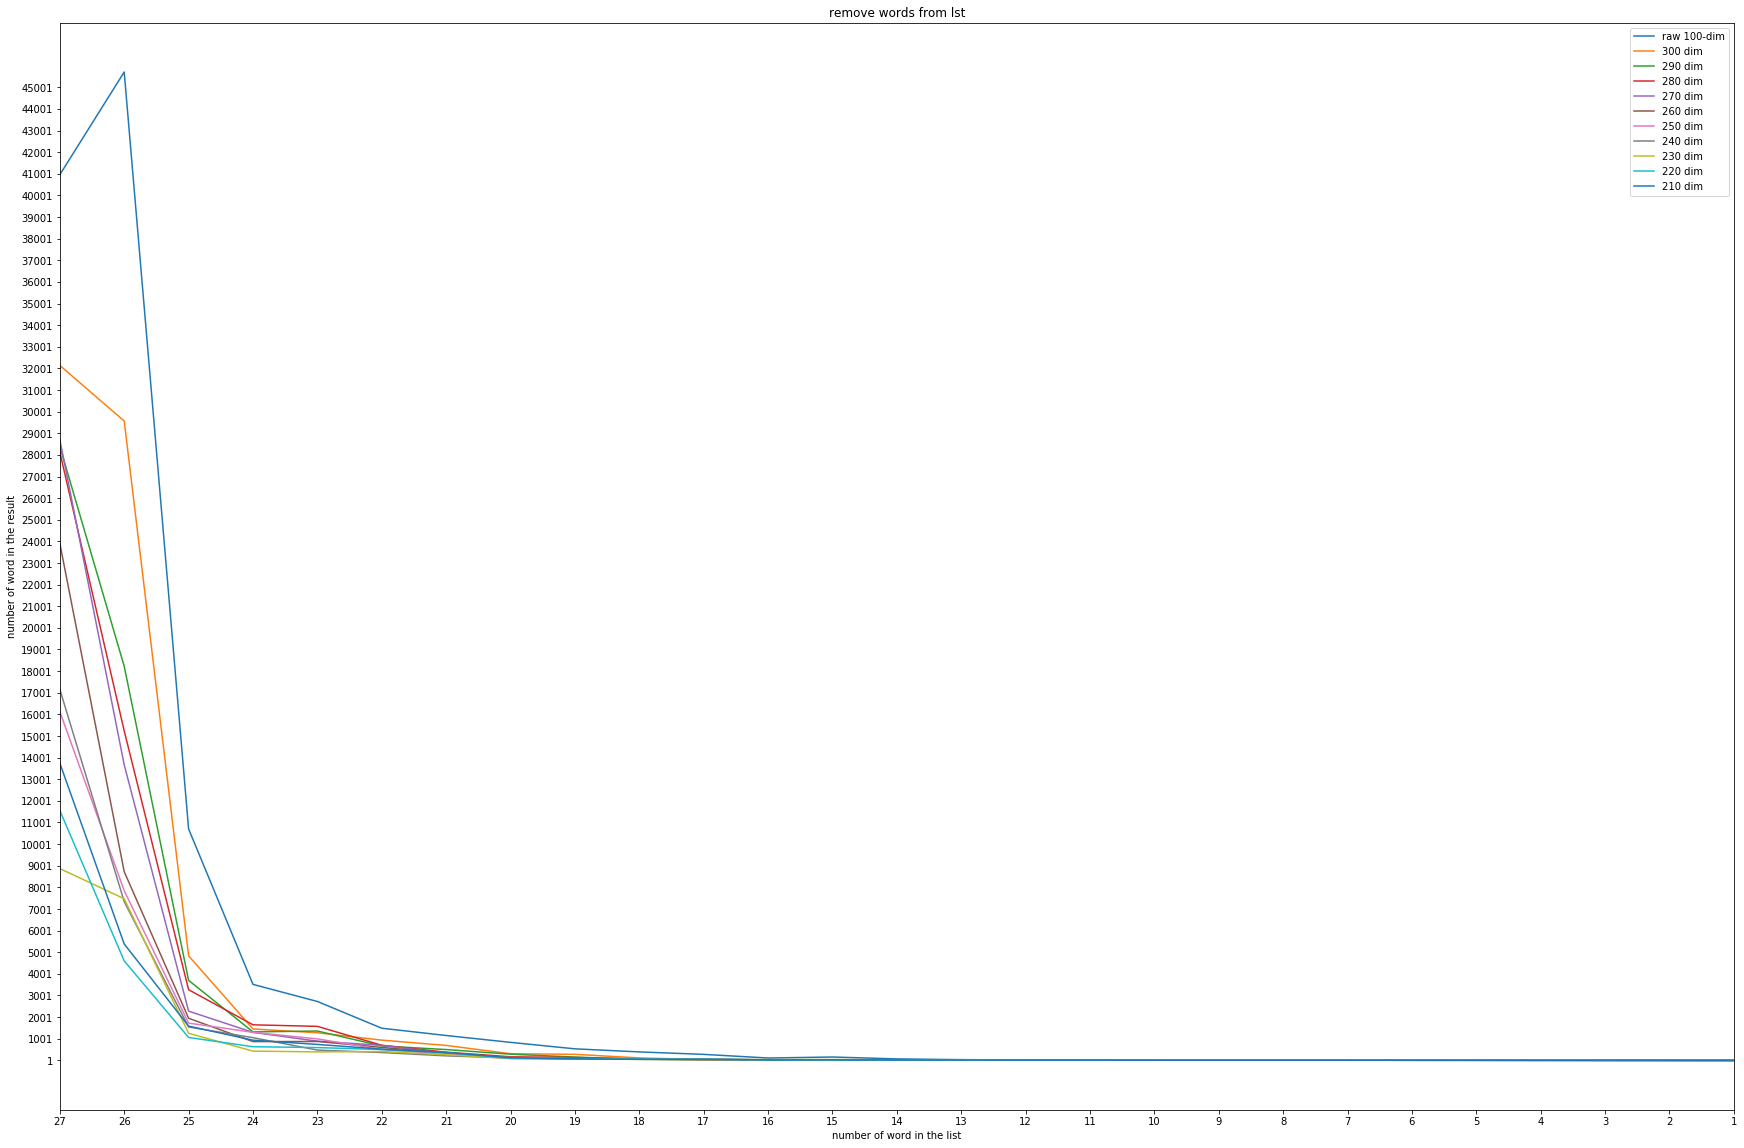

In [72]:
#plt.plot(x,res2[0], label="100-dim,5-epochs")
plt.plot(x,res2[1], label="raw 100-dim")
for i in range(len(res2)-2):
    plt.plot(x,res2[i+2], label=str(300-i*10)+" dim")
plt.xlabel("number of word in the list")
plt.ylabel("number of word in the result")
plt.gca().invert_xaxis()
fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 5 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size)
plt.xticks(numpy.arange(min(x), max(x)+1, 1.0))
plt.yticks(numpy.arange(min(res2[1]), max(res2[1])+1, 1000.0))
plt.title("remove words from lst")
plt.legend()
plt.show()

In [12]:
utils.one_mean(lst,arr[-2])

[('זצ"ל', 0.8080002069473267),
 ('נר"ו', 0.8072768449783325),
 ('יצ"ו', 0.7336881756782532),
 ('זלה"ה', 0.7185731530189514),
 ('זצוק"ל', 0.7161690592765808),
 ('הי"ו', 0.7115868330001831),
 ('שליט"א', 0.7096238136291504),
 ('כמהר"ר', 0.6831211447715759),
 ('מהר"ר', 0.6760484576225281),
 ('נ"י', 0.6713858246803284),
 ('כמה"ר', 0.6656075119972229),
 ('מוהר"ר', 0.6481035947799683),
 ('כמוה"ר', 0.6141230463981628),
 ('כמוהר"ר', 0.6112924814224243),
 ('הרה"ג', 0.604163646697998),
 ('המובהק', 0.6039486527442932),
 ('מה"ר', 0.5885455012321472),
 ('ז"ל', 0.5830937027931213),
 ('זצללה"ה', 0.5794768929481506),
 ('מוה"ר', 0.5771586298942566),
 ('כמה"רר', 0.5616700053215027),
 ('זי"ע', 0.559884786605835),
 ('זיע"א', 0.555835485458374),
 ('נ"ע', 0.5509457588195801),
 ('י"ץ', 0.5468782782554626),
 ('זללה"ה', 0.5336942672729492),
 ('הגאון', 0.5306758284568787),
 ('זצלה"ה', 0.5303788185119629),
 ('מחותני', 0.5283730030059814),
 ('הרה"ח', 0.5246590375900269),
 ('מורינו', 0.516594409942627),
 ("ני'", 0.

In [32]:
a=arr[0].wv.most_similar('ע"ה',topn=2000)
for i in range(len(a)):
    print(i,"\t",a[i])

0 	 ('כ"ה', 0.7133140563964844)
1 	 ('מ"ו', 0.7080268859863281)
2 	 ('מ"ה', 0.7031644582748413)
3 	 ('ס"ט', 0.6888720393180847)
4 	 ('כ"ו', 0.6872925758361816)
5 	 ('נ"ב', 0.6702017784118652)
6 	 ('י"ז', 0.6697126030921936)
7 	 ('מ"ח', 0.669340193271637)
8 	 ('מ"ז', 0.6681032180786133)
9 	 ('כ"ב', 0.6675497889518738)
10 	 ('כ"ח', 0.6674419045448303)
11 	 ('נ"ג', 0.6624694466590881)
12 	 ('ל"ז', 0.6607489585876465)
13 	 ('נ"א', 0.6603842973709106)
14 	 ('מ"א', 0.659457802772522)
15 	 ('נ"ו', 0.6554968953132629)
16 	 ('נ"ה', 0.6543833017349243)
17 	 ('נ"ז', 0.6540307998657227)
18 	 ('מ"ב', 0.6521416902542114)
19 	 ('כ"ג', 0.6506648659706116)
20 	 ('כ"ט', 0.6463190913200378)
21 	 ('קי"ג', 0.6438941955566406)
22 	 ('ק"ט', 0.6398587226867676)
23 	 ('ל"ו', 0.6385976076126099)
24 	 ('צ"ד', 0.637383759021759)
25 	 ('ע"ט', 0.634748101234436)
26 	 ('ל"ב', 0.6340262293815613)
27 	 ('מ"ג', 0.6336537599563599)
28 	 ('קל"ט', 0.6320391893386841)
29 	 ('י"ג', 0.6309175491333008)
30 	 ('כ"ד', 0.6297561

565 	 ('תקמ"ה', 0.45414048433303833)
566 	 ('תפ"ח', 0.45375964045524597)
567 	 ('רכד', 0.4536306858062744)
568 	 ('קסה', 0.45359471440315247)
569 	 ('רצ"ה', 0.45352235436439514)
570 	 ('כהן', 0.45320144295692444)
571 	 ('רל"ז', 0.4530913233757019)
572 	 ('תפ"ד', 0.45308977365493774)
573 	 ('שצ"ב', 0.452947199344635)
574 	 ('שמ"ו', 0.4529343545436859)
575 	 ('תרע"ג', 0.45272117853164673)
576 	 ('רכג', 0.45262739062309265)
577 	 ('תקסה', 0.45253077149391174)
578 	 ('ב"ך', 0.452484130859375)
579 	 ('רנה', 0.45239782333374023)
580 	 ('תרצ"ו', 0.45239007472991943)
581 	 ('קצט', 0.4522385597229004)
582 	 ('תנ', 0.4520861506462097)
583 	 ('שנ"ד', 0.45196348428726196)
584 	 ('ר"ך', 0.45178529620170593)
585 	 ('זי"ת', 0.4516792297363281)
586 	 ('תרכ"ח', 0.451286643743515)
587 	 ('פ"ב', 0.45103323459625244)
588 	 ('רה', 0.45094871520996094)
589 	 ('תקפ"ט', 0.45092612504959106)
590 	 ('תתקס"ה', 0.45088231563568115)
591 	 ('עה"ר', 0.4508155584335327)
592 	 ('תצ"ח', 0.4507768750190735)
593 	 ('קצז'

1298 	 ('שע"ד', 0.3400977849960327)
1299 	 ('רפט', 0.34005534648895264)
1300 	 ('ומהריט"צ', 0.33996161818504333)
1301 	 ('ותרי"ט', 0.33994123339653015)
1302 	 ('תגררהו', 0.33991172909736633)
1303 	 ('ממונקטש', 0.33964887261390686)
1304 	 ('זכל"א', 0.3392040729522705)
1305 	 ('חמאן', 0.33910784125328064)
1306 	 ('תתמ"ט', 0.3391002416610718)
1307 	 ('תמח', 0.33896222710609436)
1308 	 ('תלז', 0.33881106972694397)
1309 	 ('בחסידות', 0.33872875571250916)
1310 	 ('רכב', 0.33846744894981384)
1311 	 ('ושו"ג', 0.33844810724258423)
1312 	 ('התרע"ה', 0.33834943175315857)
1313 	 ('תשפ"ט', 0.338317334651947)
1314 	 ('תריט', 0.3382790684700012)
1315 	 ('תקפט', 0.33808961510658264)
1316 	 ('הנד"מ', 0.3380735218524933)
1317 	 ('תתקמ"ד', 0.33801865577697754)
1318 	 ('תרעט', 0.3379971981048584)
1319 	 ('שצז', 0.33790838718414307)
1320 	 ('אבודרהם', 0.33781898021698)
1321 	 ('תשע"ז', 0.3374814987182617)
1322 	 ('קט"ן', 0.3373958170413971)
1323 	 ('ספ"א', 0.3373478353023529)
1324 	 ('שכט', 0.3372548818588

1930 	 ('זמרי', 0.2960939407348633)
1931 	 ('אלפנדארי', 0.2960885465145111)
1932 	 ('נוב"ק', 0.29606306552886963)
1933 	 ('במט"א', 0.2960015833377838)
1934 	 ("יט'", 0.29598355293273926)
1935 	 ('וע"ל', 0.2959712743759155)
1936 	 ('ישראל', 0.29595980048179626)
1937 	 ('תתמ"ב', 0.2959396243095398)
1938 	 ('זימרא', 0.29592669010162354)
1939 	 ('שונמית', 0.2958619296550751)
1940 	 ('מהולל', 0.2958124577999115)
1941 	 ('ציס"ע', 0.2957727909088135)
1942 	 ('תר"פ', 0.2956715524196625)
1943 	 ('תשמ"ו', 0.2955303490161896)
1944 	 ('וחסיד', 0.2954505980014801)
1945 	 ('תרלז', 0.2953910529613495)
1946 	 ('דקצ"ב', 0.2952858507633209)
1947 	 ('תשמ"ז', 0.29527002573013306)
1948 	 ('תתקמ"ז', 0.2951771318912506)
1949 	 ('סכ"ד', 0.295174241065979)
1950 	 ('כמהר"ר', 0.2951361835002899)
1951 	 ('תתנשא', 0.295113205909729)
1952 	 ('קארפעלעס', 0.29509836435317993)
1953 	 ('ונביא', 0.2950977683067322)
1954 	 ('תק"ף', 0.29509514570236206)
1955 	 ('תקו', 0.2950716018676758)
1956 	 ("ולה'", 0.295062780380249)

In [24]:
a=arr[2].wv.most_similar('יצ"ו',topn=200)
for i in range(len(a)):
    print(i,"\t",a[i])

0 	 ('הי"ו', 0.7168381214141846)
1 	 ('נר"ו', 0.6931386590003967)
2 	 ('י"ץ', 0.6630098819732666)
3 	 ('נ"ע', 0.6202220320701599)
4 	 ('שליט"א', 0.6139285564422607)
5 	 ('יע"א', 0.6044933795928955)
6 	 ('נ"י', 0.5772348046302795)
7 	 ("יצו'", 0.5493037700653076)
8 	 ('הנעלה', 0.5479306578636169)
9 	 ('י"צו', 0.5419997572898865)
10 	 ('הנכבד', 0.5374161005020142)
11 	 ('בק"ק', 0.53423011302948)
12 	 ('דק"ק', 0.52959144115448)
13 	 ('הישיש', 0.5194326043128967)
14 	 ('אלופי', 0.517160177230835)
15 	 ('כמה"ר', 0.5134219527244568)
16 	 ('ני"ל', 0.5092092752456665)
17 	 ('הנבון', 0.5088362693786621)
18 	 ('יחשל"א', 0.5046477317810059)
19 	 ('לאי"ט', 0.5023624300956726)
20 	 ('מק"ק', 0.5007176399230957)
21 	 ('דקהלתנו', 0.5006077885627747)
22 	 ('נר"י', 0.5004514455795288)
23 	 ('ישצ"ו', 0.4943273961544037)
24 	 ('כה"ר', 0.4920938313007355)
25 	 ('האלוף', 0.4900504946708679)
26 	 ("ני'", 0.489386647939682)
27 	 ("שיחי'", 0.4890294373035431)
28 	 ('זלה"ה', 0.4878793954849243)
29 	 ("הנז'", 0.

In [29]:
counter=0
for i in reslst:
    print (counter,"\n----------------\n-----------------\n\n",i,"\n\n\n\n")
    counter+=1

0 
----------------
-----------------

 [['אבי', 'הי"ו', 'הצעיר', 'הראשונים', 'הרה"ג', 'ואביו', 'והנ"י', 'ז"ל', 'זי"ע', 'זיע"א', 'זלה"ה', 'זללה"ה', 'זצ"ל', 'זצוק"ל', 'זקני', 'יצ"ו', 'כמה"ר', 'כמוה"ר', 'מהר"ר', 'מו"ר', 'נ"י', 'נ"ר', 'נר"ו', 'סילט"א', 'ע"ה', 'שליט"א', 'תלמידי'], ['אבי', 'הי"ו', 'הצעיר', 'הראשונים', 'הרה"ג', 'ואביו', 'והנ"י', 'ז"ל', 'זי"ע', 'זיע"א', 'זלה"ה', 'זללה"ה', 'זצ"ל', 'זצוק"ל', 'זקני', 'יצ"ו', 'כמה"ר', 'כמוה"ר', 'מהר"ר', 'מו"ר', 'נ"י', 'נ"ר', 'נר"ו', 'סילט"א', 'ע"ה', 'שליט"א', 'תלמידי'], ['אבי', 'הי"ו', 'הצעיר', 'הראשונים', 'הרה"ג', 'ואביו', 'והנ"י', 'ז"ל', 'זי"ע', 'זיע"א', 'זלה"ה', 'זללה"ה', 'זצ"ל', 'זצוק"ל', 'זקני', 'יצ"ו', 'כמה"ר', 'כמוה"ר', 'מהר"ר', 'מו"ר', 'נ"י', 'נ"ר', 'נר"ו', 'סילט"א', 'ע"ה', 'שליט"א', 'תלמידי'], ['אבי', 'הי"ו', 'הצעיר', 'הראשונים', 'הרה"ג', 'ואביו', 'והנ"י', 'ז"ל', 'זי"ע', 'זיע"א', 'זלה"ה', 'זללה"ה', 'זצ"ל', 'זצוק"ל', 'זקני', 'יצ"ו', 'כמה"ר', 'כמוה"ר', 'מהר"ר', 'מו"ר', 'נ"י', 'נ"ר', 'נר"ו', 'סילט"א', 'ע"ה', 'שליט"א', 'תלמידי'], ['אבי', 'הי

In [43]:
t150=remove_dim(lst,gensim.models.Word2Vec.load("w2v_56_300dim_heb"),30)

In [44]:
t150.wv.most_similar('ע"ה',topn=300)

[('כא"ש', 0.715492844581604),
 ('הקיטל', 0.7035484313964844),
 ('מרור', 0.7011406421661377),
 ('תתכ"ח', 0.6902398467063904),
 ('רה"ע', 0.6873784065246582),
 ('רנ"ו', 0.6629047989845276),
 ('הרד"ע', 0.6624672412872314),
 ('ג"ן', 0.6558182239532471),
 ('ש"ב', 0.6521074175834656),
 ('תנ"ג', 0.6471713781356812),
 ('והארות', 0.6440690755844116),
 ('קישור', 0.6426497101783752),
 ('ער"א', 0.6318455338478088),
 ('קע"ט', 0.627483606338501),
 ('תרנ"א', 0.6273546814918518),
 ('תרכ"ז', 0.6257091760635376),
 ('ר"ז', 0.6207776665687561),
 ('ובחותמו', 0.6171151399612427),
 ('והדור', 0.6164267063140869),
 ('מנתין', 0.6155927181243896),
 ('תר"צ', 0.6148267388343811),
 ('קפא', 0.6130015850067139),
 ('ובס"ב', 0.612619161605835),
 ('רל"ג', 0.6114166975021362),
 ('רי"ז', 0.6088621020317078),
 ('ע"ט', 0.6079484820365906),
 ('ואנוהו', 0.6079093813896179),
 ('סריס', 0.6076546311378479),
 ('ושכת"ה', 0.6073601245880127),
 ('אעדים', 0.6039490103721619),
 ('רל"ד', 0.6033350825309753),
 ('קסז', 0.6028350591659546)

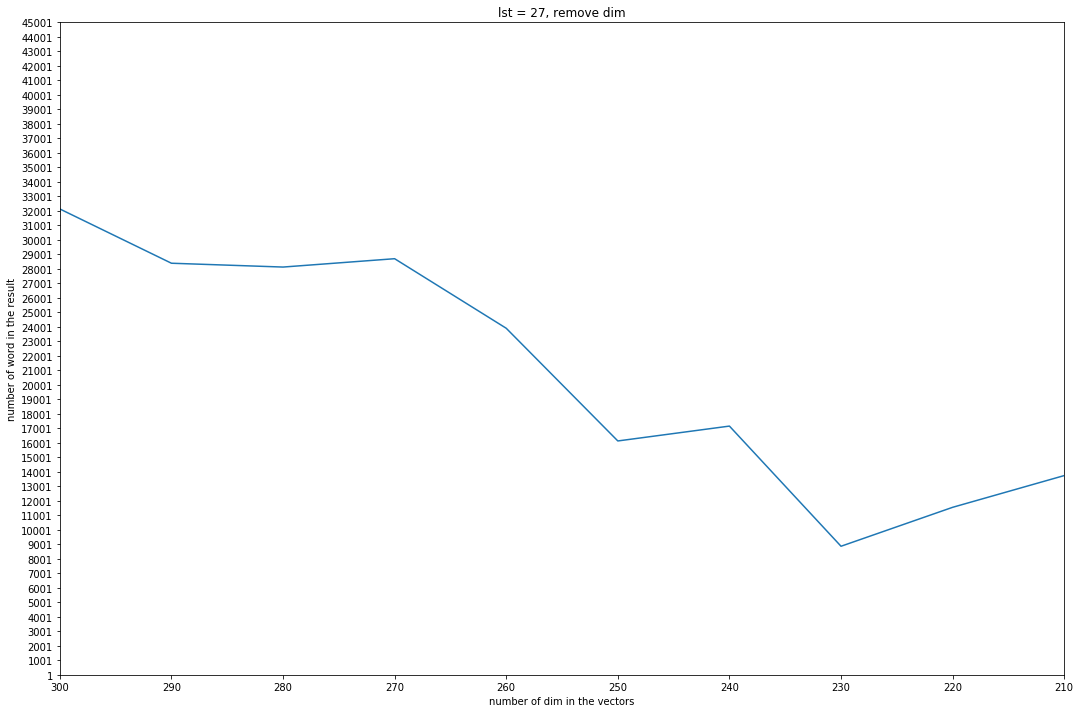

In [55]:
#plt.plot(x,res2[0], label="100-dim,5-epochs")
#plt.plot(x,res2[1], label="100-dim,56-epochs")
x = range(300,200,-10)
q=[]
for i in range(len(res2)-2):
        q.append(res2[i+2][0])
plt.plot(x,q)
plt.xlabel("number of dim in the vectors")
plt.ylabel("number of word in the result")
plt.gca().invert_xaxis()
fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 3 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size)
plt.xticks(numpy.arange(min(x), max(x)+1, 10.0))
plt.yticks(numpy.arange(min(res2[1]), max(res2[1])+1, 1000.0))
plt.title("lst = 27, remove dim")
plt.show()

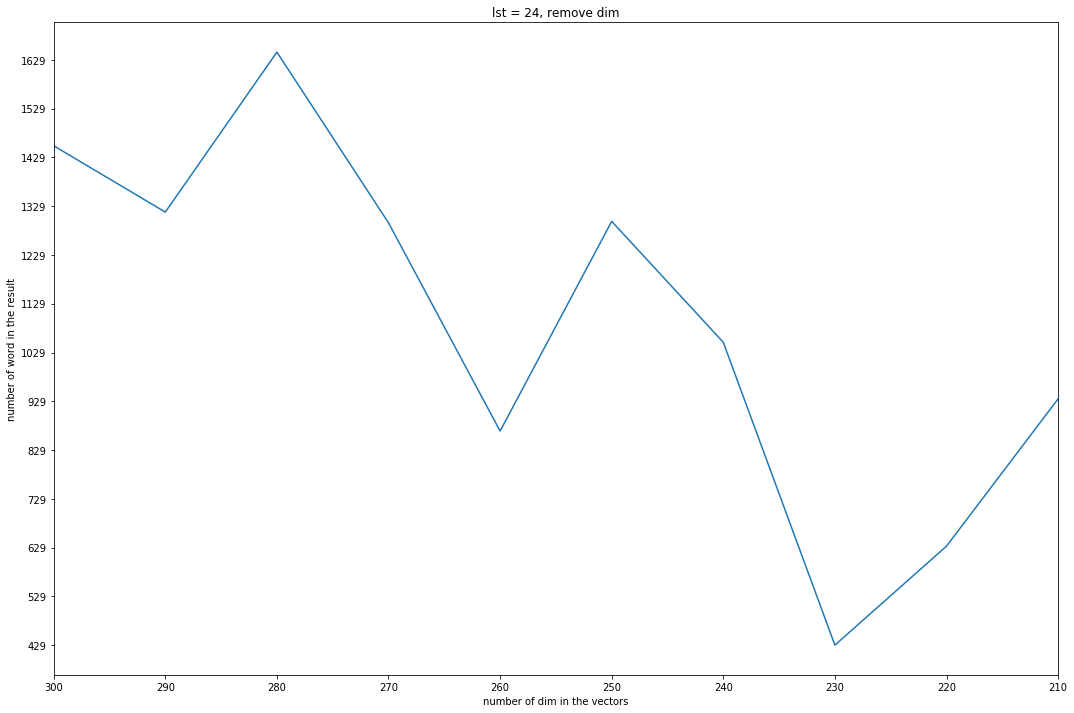

In [64]:
#plt.plot(x,res2[0], label="100-dim,5-epochs")
#plt.plot(x,res2[1], label="100-dim,56-epochs")
x = range(300,200,-10)
q=[]
for i in range(len(res2)-2):
        q.append(res2[i+2][3])
plt.plot(x,q)
plt.xlabel("number of dim in the vectors")
plt.ylabel("number of word in the result")
plt.gca().invert_xaxis()
fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 3 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size)
plt.xticks(numpy.arange(min(x), max(x)+1, 10.0))
plt.yticks(numpy.arange(min(q), max(q)+1, 100.0))
plt.title("lst = 24, remove dim")
plt.show()

In [45]:
res2[1]

[40957,
 45706,
 10706,
 3515,
 2724,
 1488,
 1150,
 833,
 534,
 392,
 278,
 110,
 156,
 68,
 33,
 20,
 15,
 16,
 29,
 8,
 6,
 6,
 5,
 4,
 3,
 2,
 1]